Mean: 0.06458859080696733
Standard Deviation: 0.5755676931267478


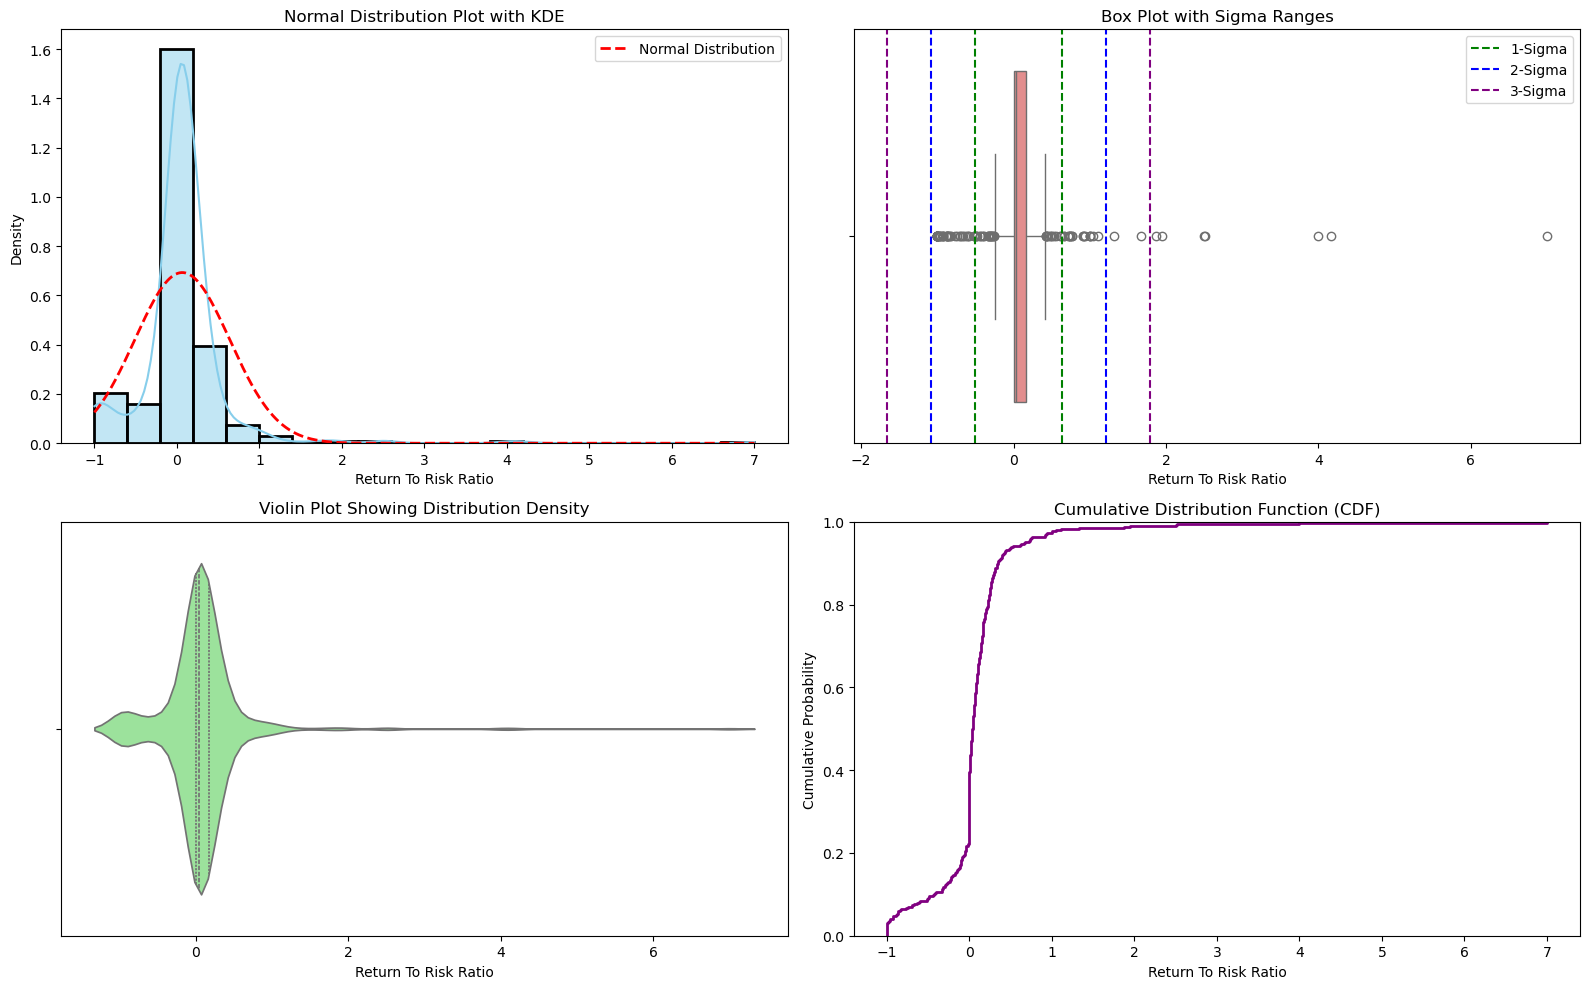

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

# Load the data from the Excel file
file_path = r'C:\Users\surve\OneDrive\Desktop\IT INDUSTRY.XLSX'
df = pd.read_excel(file_path, sheet_name='14')

# Extract the 'RETURN TO RISK RATIO' column
risk_ratios = df['RETURN TO RISK RATIO'].dropna()  # Remove NaN values if any

# Calculate mean and standard deviation
mean = np.mean(risk_ratios)
std_dev = np.std(risk_ratios)

# Print the mean and standard deviation
print(f"Mean: {mean}")
print(f"Standard Deviation: {std_dev}")

# Create normal distribution data for plotting
x = np.linspace(min(risk_ratios), max(risk_ratios), 1000)
y = norm.pdf(x, mean, std_dev)

# Plotting the distribution and the normal curve
plt.figure(figsize=(16, 10))

# Plot 1: Normal Distribution Plot with KDE
plt.subplot(2, 2, 1)
sns.histplot(risk_ratios, kde=True, color='skyblue', stat='density', bins=20, linewidth=2)
plt.plot(x, y, color='red', label="Normal Distribution", linestyle='--', linewidth=2)
plt.title("Normal Distribution Plot with KDE")
plt.xlabel("Return To Risk Ratio")
plt.ylabel("Density")
plt.legend()

# Plot 2: Box Plot with 1-sigma, 2-sigma, 3-sigma ranges
plt.subplot(2, 2, 2)
sns.boxplot(x=risk_ratios, color='lightcoral')
plt.axvline(mean - std_dev, color='green', linestyle='--', label="1-Sigma")
plt.axvline(mean + std_dev, color='green', linestyle='--')
plt.axvline(mean - 2*std_dev, color='blue', linestyle='--', label="2-Sigma")
plt.axvline(mean + 2*std_dev, color='blue', linestyle='--')
plt.axvline(mean - 3*std_dev, color='purple', linestyle='--', label="3-Sigma")
plt.axvline(mean + 3*std_dev, color='purple', linestyle='--')
plt.title("Box Plot with Sigma Ranges")
plt.xlabel("Return To Risk Ratio")
plt.legend()

# Plot 3: Violin Plot to show distribution density
plt.subplot(2, 2, 3)
sns.violinplot(x=risk_ratios, color='lightgreen', inner='quart')
plt.title("Violin Plot Showing Distribution Density")
plt.xlabel("Return To Risk Ratio")

# Plot 4: Cumulative Distribution Function (CDF)
plt.subplot(2, 2, 4)
sns.ecdfplot(risk_ratios, color='purple', linestyle='-', linewidth=2)
plt.title("Cumulative Distribution Function (CDF)")
plt.xlabel("Return To Risk Ratio")
plt.ylabel("Cumulative Probability")

# Adjust layout and show all plots
plt.tight_layout()
plt.show()
